In [1]:
import os
import sys
import librosa
import tflearn
import pydub
import speech_data
import segment_data
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline

cur = os.getcwd()
os.chdir('/home/cc/')
import pyAudioAnalysis
os.chdir(cur)

hdf5 not supported (please install/reinstall h5py)


/usr/local/lib/python2.7/dist-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# load constants - training directory, testing directory
training_data = '/home/cc/Audio/training/'
testing_data = '/home/cc/Audio/testing/'
training_seg = '/home/cc/Audio/training-seg/'
testing_seg = '/home/cc/Audio/testing-seg/'

In [3]:
# segment the data for use with SVM later
segment_data.segment(training_data, training_seg, 2)
segment_data.segment(testing_data, testing_seg, 2)

number of files: 14
(2, ' speakers: ', ['arun', 'andrew'])
number of files: 4
(2, ' speakers: ', ['arun', 'andrew'])


In [4]:
# now let us view some of the files analytically
files = os.listdir(training_seg)
arun_seg = []
andrew_seg = []
for f in files:
    if 'arun' in f:
        arun_seg.append(f)
    else:
        andrew_seg.append(f)
print('arun_seg length = ' + str(len(arun_seg)) + ' and andrew_seg length = ' + str(len(andrew_seg)))

arun_seg length = 37 and andrew_seg length = 36


In [5]:
# obtain mfcc data for analyzing
os.chdir(training_seg)
arun_mfcc = []
andrew_mfcc = []
for a, b in zip(arun_seg, andrew_seg):
    y, sr = librosa.load(a)
    y1, sr1 = librosa.load(b)
    arun_mfcc.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20))
    andrew_mfcc.append(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=20))

In [6]:
dist = np.linalg.norm(arun_mfcc)
dist1 = np.linalg.norm(andrew_mfcc)

In [7]:
print(dist, dist1)

(20046.384063670655, 18384.539265191532)


In [8]:
from sklearn.decomposition import PCA
pca = PCA(arun_mfcc)
pca1 = PCA(andrew_mfcc)

In [9]:
#calculate 2d indicators
def indic(data):
    #alternatively you can calulate any other indicators
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    #s = np.std(data, axis=1)
    return max, min

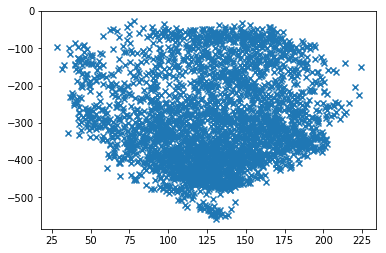

In [10]:
x,y = indic(arun_mfcc)
x1,y1 = indic(andrew_mfcc)
plt.scatter(x,y, marker='x')
plt.show()

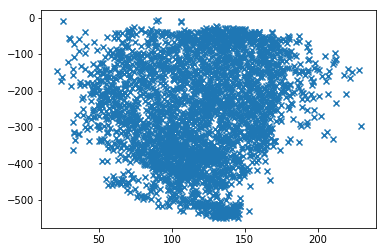

In [11]:
plt.scatter(x1, y1, marker='x')
plt.show()

In [12]:
# obtain mfcc data for analyzing
os.chdir(training_data)
arun = []
andrew = []
for f in os.listdir(os.getcwd()):
    if 'arun' in f:
        arun.append(f)
    else:
        andrew.append(f)
arun_mfcc2 = []
andrew_mfcc2 = []
for a, b in zip(arun, andrew):
    y, sr = librosa.load(a)
    y1, sr1 = librosa.load(b)
    arun_mfcc2.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20))
    andrew_mfcc2.append(librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=20))

In [13]:
data1 = []
data2 = []
for item, item2 in zip(arun_mfcc2, andrew_mfcc2):
    data1.append(item)
    data2.append(item2)

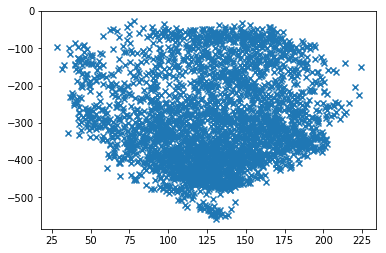

In [14]:
x,y = indic(arun_mfcc)
x1,y1 = indic(andrew_mfcc)
plt.scatter(x,y, marker='x')
plt.show()

In [15]:
from sklearn.decomposition import PCA

In [25]:
arun_pca = []
andrew_pca = []
for a, b in zip(arun_mfcc, andrew_mfcc):
    arun_pca.append(PCA(a))
    andrew_pca.append(PCA(b))

In [26]:
try1 = []
for item in arun_pca:
    try1.append(item.n_components)

ValueError: x and y can be no greater than 2-D, but have shapes (36,) and (36, 20, 87)

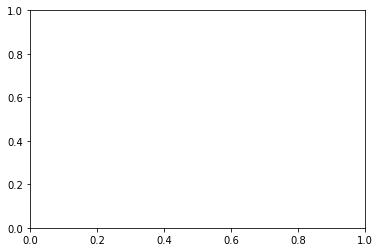

In [29]:
plt.plot(try1)